In [1]:
# Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset

In [4]:
corolla = pd.read_csv("D:\Data science\Assignments docs\Multi linear Regression\Toyota_corolla.csv", encoding= 'unicode_escape')
corolla.head(1)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0


In [5]:
corolla.shape

(1436, 38)

In [6]:
# considering only the important variables 

In [7]:
cor = corolla.loc[ : ,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cor.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
# Renaming the columns for convinience

In [9]:
cor = cor.rename(columns={"Age_08_04":"Age", "Quarterly_Tax":"Quar_tax"})
cor.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quar_tax',
       'Weight'],
      dtype='object')

In [10]:
# Correlation matrix

In [11]:
cor.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quar_tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quar_tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [12]:
# There exists some collinearity between input variables especially between weight and Quar_tax

In [13]:
import seaborn as sns

In [14]:
# Scatter plot between the variables along with histograms

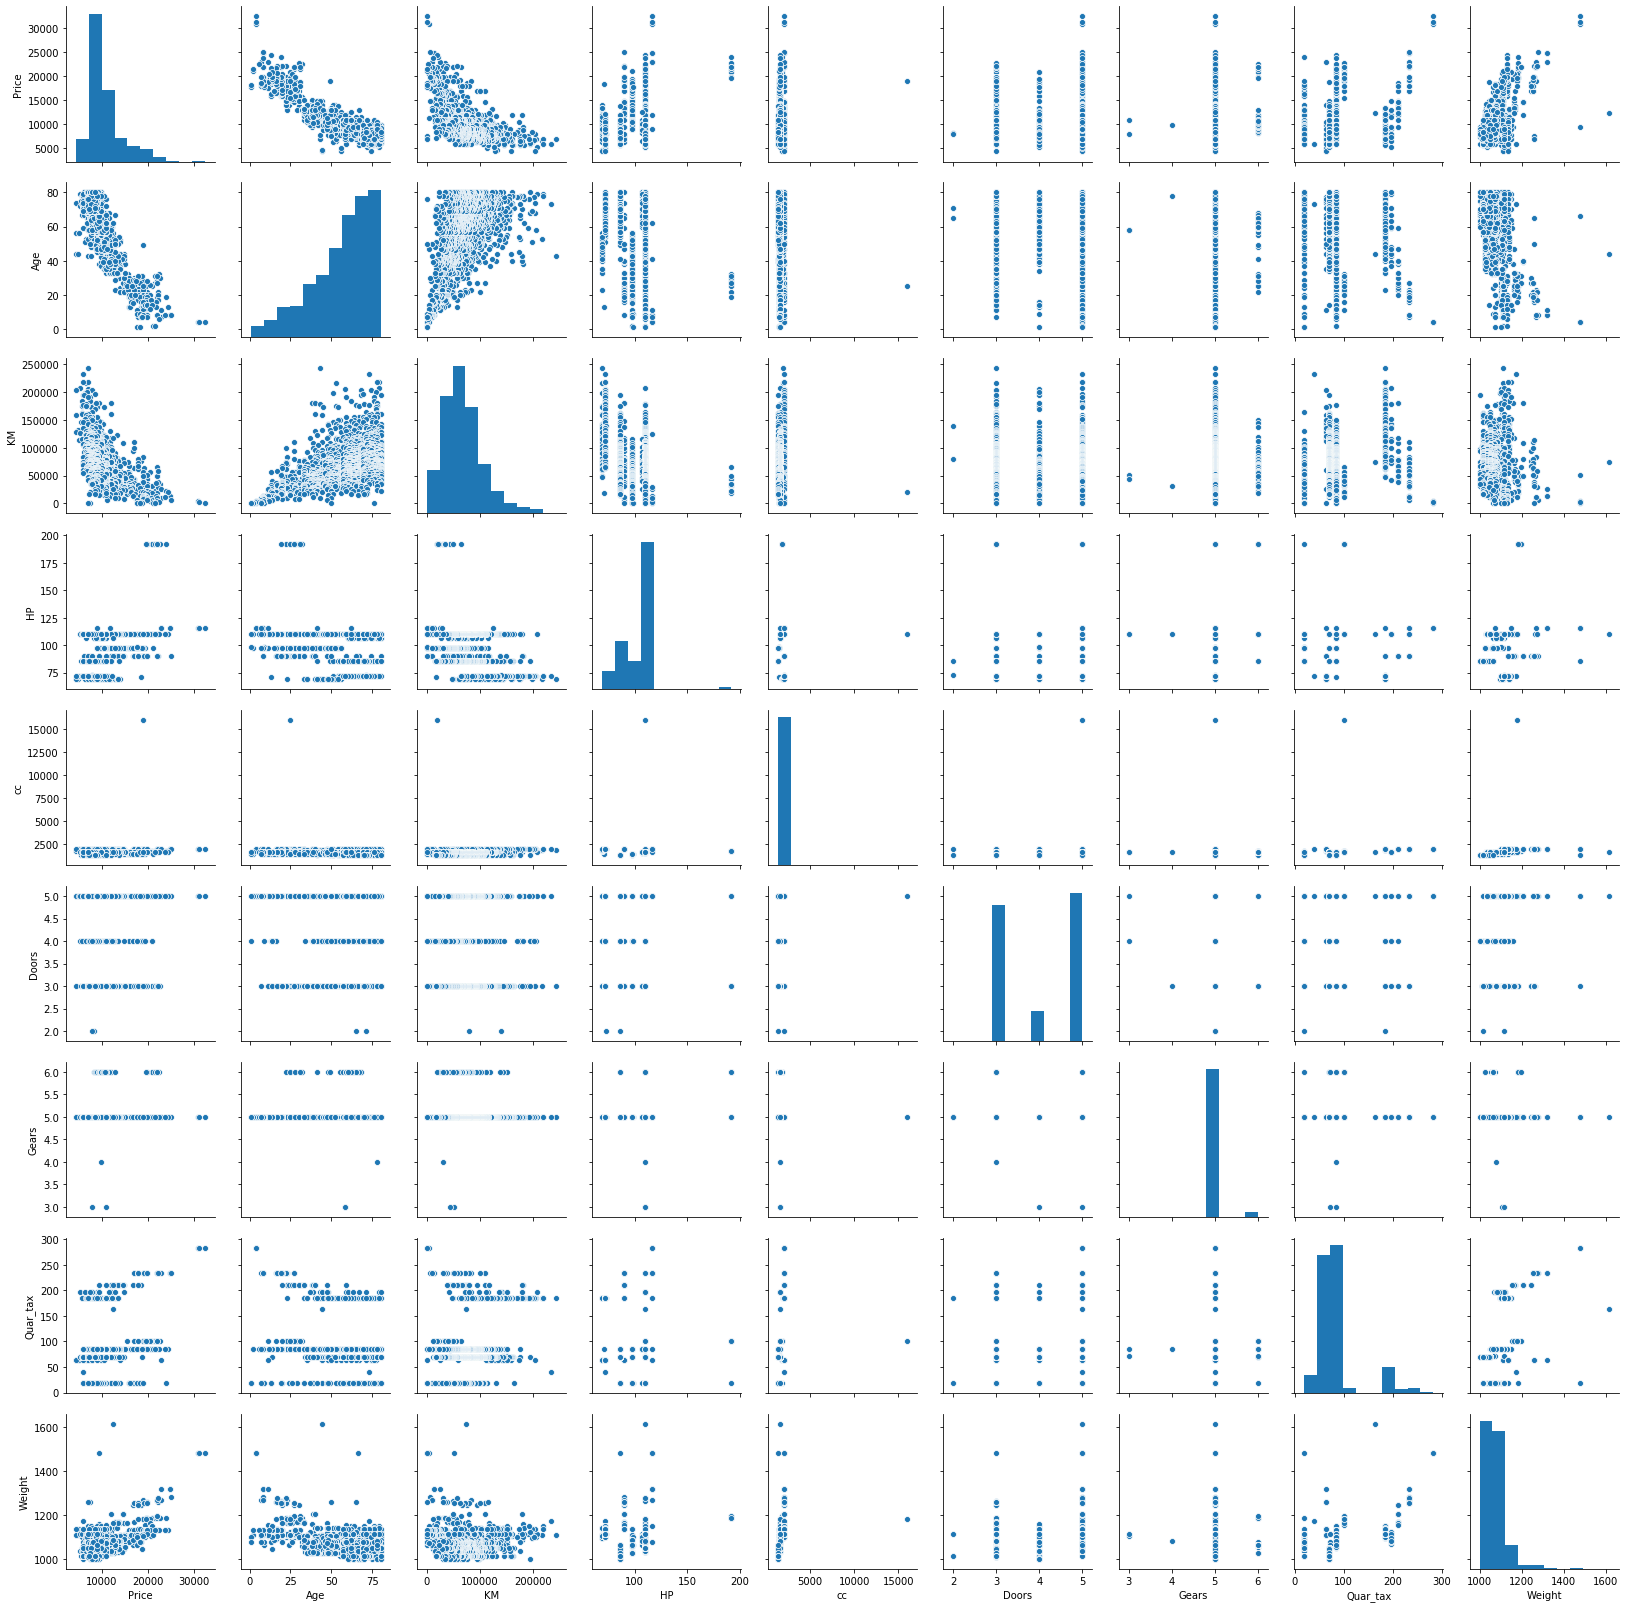

In [15]:
sns.pairplot(cor)

In [16]:
cor.columns              # column names

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quar_tax',
       'Weight'],
      dtype='object')

In [17]:
import statsmodels.formula.api as smf

In [18]:
# preparing model considering all the variables 

In [19]:
ml1 = smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quar_tax+Weight", data=cor).fit()
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:57:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Quar_tax       3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# p-values for Doors and cc are more than 0.05 

In [21]:
ml1.params             # Getting coefficients of variables

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Quar_tax        3.949081
Weight         16.958632
dtype: float64

In [22]:
# preparing model based only on cc

In [23]:
ml_cc =smf.ols("Price~cc", data=cor).fit()
ml_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.55e-06
Time:                        23:57:38   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# preparing model based only on Doors

In [25]:
ml_dr = smf.ols("Price~Doors", data=cor).fit()
ml_dr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.46e-12
Time:                        23:57:38   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# preparing model based on Market_spnd and Admin

In [27]:
ml_cd =smf.ols("Price~cc+Doors",data=cor).fit()
ml_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           1.15e-15
Time:                        23:57:38   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Both coefficients p-value are significant when used togther without other variables

In [29]:
import statsmodels.api as sm

In [30]:
# Checking whether data has any influential values

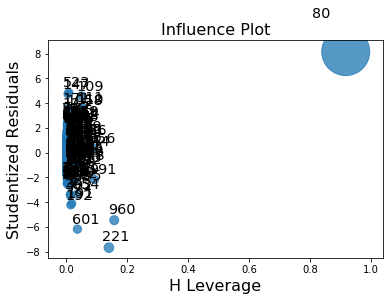

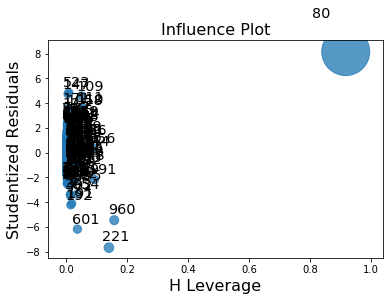

In [31]:
sm.graphics.influence_plot(ml1)            # influence index plots

In [32]:
# index 80 AND 221 is showing high influence so we can exclude that entire row

In [33]:
cor_new = cor.drop(cor.index[[80,221]],axis=0)

In [34]:
# Preparing new model 

In [35]:
ml_new=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quar_tax+Weight", data=cor_new).fit()
ml_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:57:45   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age         -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM            -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP            39.2932      2.816     13.953      0.000      33.769      44.817
cc            -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors        -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears        485.0462    186.602      2.599      0.009     119.001     851.091
Quar_tax       7.9664      1.382      5.762      0.000       5.254      10.678
Weight        25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
ml_new.params        # Getting coefficients of variables

Intercept   -10252.423706
Age           -116.578270
KM              -0.017276
HP              39.293161
cc              -3.205654
Doors          -65.371801
Gears          485.046195
Quar_tax         7.966393
Weight          25.049440
dtype: float64

In [37]:
print(ml_new.conf_int(0.05))     # for 95% confidence interval

                      0            1
Intercept -12990.335820 -7514.511593
Age         -121.498878  -111.657662
KM            -0.019703    -0.014850
HP            33.769115    44.817208
cc            -3.803911    -2.607397
Doors       -140.211699     9.468097
Gears        119.001442   851.090949
Quar_tax       5.254479    10.678307
Weight        22.723838    27.375042


In [38]:
# predicted values of Price

In [39]:
pred = ml_new.predict(cor_new)
pred

0       16464.269143
1       16015.934400
2       16438.822844
3       16097.016263
4       15920.074311
            ...     
1431     9015.088083
1432     8441.533328
1433     8592.387585
1434     8710.693475
1435    10235.621866
Length: 1434, dtype: float64

In [40]:
# calculating VIF's values of independent variables

In [41]:
rsq_ag =smf.ols("Age~KM+HP+cc+Doors+Gears+Quar_tax+Weight",data=cor_new).fit().rsquared

In [42]:
vif_ag= 1/(1-rsq_ag)
vif_ag

1.9333303962921256

In [43]:
rsq_km =smf.ols("KM~Age+HP+cc+Doors+Gears+Quar_tax+Weight",data=cor_new).fit().rsquared

In [44]:
vif_km= 1/(1-rsq_km)
vif_km

1.9136778018194944

In [45]:
rsq_hp =smf.ols("HP~Age+KM+cc+Doors+Gears+Quar_tax+Weight",data=cor_new).fit().rsquared

In [46]:
vif_hp= 1/(1-rsq_hp)
vif_hp

1.5834846287252988

In [47]:
rsq_cc =smf.ols("cc~Age+KM+HP+Doors+Gears+Quar_tax+Weight",data=cor_new).fit().rsquared

In [48]:
vif_cc= 1/(1-rsq_cc)
vif_cc

2.9006431867537437

In [49]:
rsq_dr =smf.ols("Doors~Age+KM+HP+cc+Gears+Quar_tax+Weight",data=cor_new).fit().rsquared

In [50]:
vif_dr= 1/(1-rsq_dr)
vif_dr

1.174197251680118

In [51]:
rsq_gr =smf.ols("Gears~Age+KM+HP+cc+Doors+Quar_tax+Weight",data=cor_new).fit().rsquared

In [52]:
vif_gr= 1/(1-rsq_gr)
vif_gr

1.1013753302063232

In [53]:
rsq_qt =smf.ols("Quar_tax~Age+KM+HP+cc+Doors+Gears+Weight",data=cor_new).fit().rsquared

In [54]:
vif_qt= 1/(1-rsq_qt)
vif_qt

2.8706887838665747

In [55]:
rsq_wt =smf.ols("Weight~Age+KM+HP+cc+Doors+Gears+Quar_tax",data=cor_new).fit().rsquared

In [56]:
vif_wt= 1/(1-rsq_wt)
vif_wt

3.199842884540069

In [57]:
# Storing vif values in a data frame

In [58]:
d1 = {'Variables':['KM','HP','CC','Doors','Gears','Quar_tax','Weight'], 'VIF':[vif_km,vif_hp,vif_cc,vif_dr,vif_gr,vif_qt,vif_wt]}

In [59]:
Vif_frame = pd.DataFrame(d1)

In [60]:
Vif_frame

,Variables,VIF
0,KM,1.913678
1,HP,1.583485
2,CC,2.900643
3,Doors,1.174197
4,Gears,1.101375
5,Quar_tax,2.870689
6,Weight,3.199843


In [61]:
# all the variables has low VIF values

In [62]:
# Added varible plot 

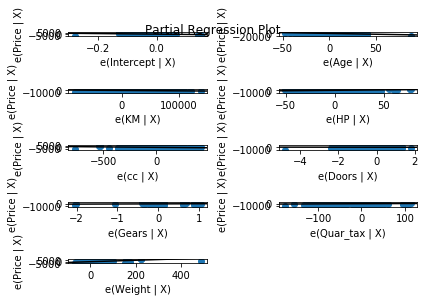

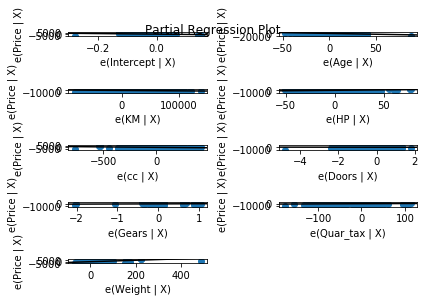

In [63]:
sm.graphics.plot_partregress_grid(ml_new)

In [64]:
# added varible plot for Doors is not showing much significance, hence it is excluded

In [65]:
# final model

In [66]:
final_ml = smf.ols("Price~Age+KM+HP+cc+Gears+Quar_tax+Weight",data=cor_new).fit()
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1461.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:57:53   Log-Likelihood:                -12280.
No. Observations:                1434   AIC:                         2.458e+04
Df Residuals:                    1426   BIC:                         2.462e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+04   1396.680     -7.341      0.000    -1.3e+04   -7513.393
Age         -116.6516      2.510    -46.479      0.000    -121.575    -111.728
KM            -0.0174      0.001    -14.074      0.000      -0.020      -0.015
HP            38.8496      2.806     13.845      0.000      33.345      44.354
cc            -3.1527      0.304    -10.384      0.000      -3.748      -2.557
Gears        547.0112    183.189      2.986      0.003     187.663     906.360
Quar_tax       8.0610      1.382      5.832      0.000       5.349      10.773
Weight        24.4820      1.139     21.492      0.000      22.247      26.717
==============================================================================
Omnibus:                      181.376   Durbin-Watson:                   1.634
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.005
Skew:                          -0.277   Prob(JB):                         0.00
Kurtosis:                       7.944   Cond. No.                     3.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
final_ml.params       # Getting coefficients of variables

Intercept   -10253.160951
Age           -116.651646
KM              -0.017394
HP              38.849557
cc              -3.152739
Gears          547.011193
Quar_tax         8.061001
Weight          24.482029
dtype: float64

In [68]:
# predicted values of price using final model

In [69]:
pred_final = final_ml.predict(cor_new)
pred_final

0       16387.000771
1       15935.615378
2       16362.101194
3       16019.408563
4       15840.452818
            ...     
1431     8968.384481
1432     8400.465214
1433     8551.626074
1434     8670.017096
1435    10271.561202
Length: 1434, dtype: float64

In [70]:
# added variable plot for the final model

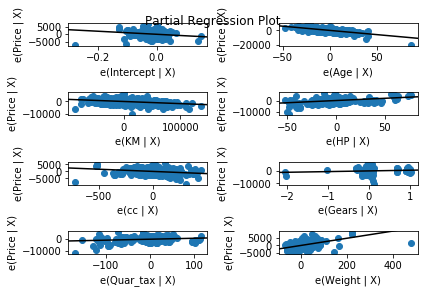

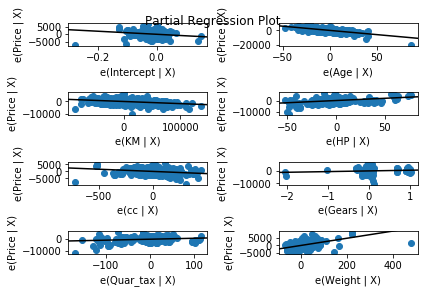

In [71]:
sm.graphics.plot_partregress_grid(final_ml)

Text(0, 0.5, 'Fitted values')

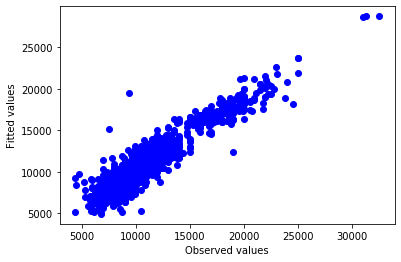

In [72]:
plt.scatter(cor_new.Price, pred_final, c="b");plt.xlabel("Observed values");plt.ylabel("Fitted values")
# Plot showing Observed values VS Fitted values

In [73]:
pred_final.corr(cor_new.Price)        # Correlation between the predicted and actual values

0.9367992896371324

Text(0, 0.5, 'Standard residuals')

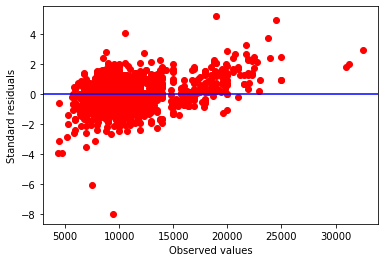

In [74]:
plt.scatter(cor_new.Price, final_ml.resid_pearson, c="r");plt.axhline(y=0,c="b");plt.xlabel("Observed values");plt.ylabel("Standard residuals")
# PLot showing Residuals VS Fitted Values

(array([  1.,   1.,   0.,   6.,  79., 594., 616., 126.,   8.,   3.]),
 array([-7.97927249, -6.66100186, -5.34273122, -4.02446059, -2.70618996,
        -1.38791932, -0.06964869,  1.24862195,  2.56689258,  3.88516322,
         5.20343385]),
 <a list of 10 Patch objects>)

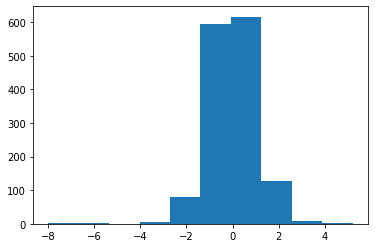

In [75]:
plt.hist(final_ml.resid_pearson)              # histogram of standardized residuals

In [76]:
import pylab
import scipy.stats as st

In [77]:
# QQ plot for residuals

((array([-3.30010144, -3.0425298 , -2.89926962, ...,  2.89926962,
          3.0425298 ,  3.30010144]),
  array([-7.97927249, -6.0630462 , -3.94510242, ...,  4.10394288,
          4.96098926,  5.20343385])),
 (0.9798250013550377, -1.7171976933847958e-12, 0.9805805420645047))

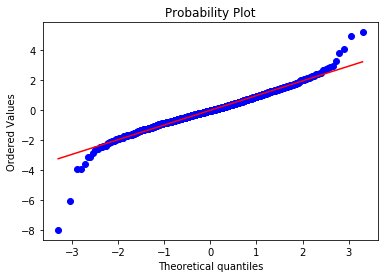

In [78]:
st.probplot(final_ml.resid_pearson, dist="norm", plot=pylab)

In [79]:
# Looking at the QQ-plot and scatter plot, the final model performs well with high R_square value and significant p-values

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
# Splitting the data into train and test data 

In [82]:
cor_train, cor_test = train_test_split(cor_new, test_size=0.2)

In [83]:
# preparing the model on train data 

In [84]:
model_train=smf.ols("Price~Age+KM+HP+cc+Gears+Quar_tax+Weight", data=cor_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1146.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:58:02   Log-Likelihood:                -9851.6
No. Observations:                1147   AIC:                         1.972e+04
Df Residuals:                    1139   BIC:                         1.976e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.044e+04   1567.157     -6.659      0.000   -1.35e+04   -7361.582
Age         -117.9570      2.896    -40.735      0.000    -123.639    -112.275
KM            -0.0169      0.001    -11.828      0.000      -0.020      -0.014
HP            41.6118      3.206     12.980      0.000      35.322      47.902
cc            -3.2678      0.352     -9.272      0.000      -3.959      -2.576
Gears        564.6190    211.888      2.665      0.008     148.883     980.355
Quar_tax       8.6008      1.607      5.351      0.000       5.447      11.754
Weight        24.4699      1.244     19.677      0.000      22.030      26.910
==============================================================================
Omnibus:                      157.936   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1396.241
Skew:                          -0.302   Prob(JB):                    6.46e-304
Kurtosis:                       8.371   Cond. No.                     3.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
train_pred= model_train.predict(cor_train)           # train_data prediction

In [86]:
train_resid = train_pred - cor_train.Price

In [87]:
# RMSE value of train data

In [88]:
train_rmse = np.sqrt(np.mean(train_resid*train_resid))
train_rmse

1299.9263893327848

In [89]:
test_pred=model_train.predict(cor_test)        # test_data prediction

In [90]:
test_resid = test_pred - cor_test.Price

In [91]:
# RMSE value of test data

In [92]:
test_rmse= np.sqrt(np.mean(test_resid*test_resid))
test_rmse

1129.9019260759517